# Explore CREG025.L75 experiments to assess the AW subduction process 
> ## This script allows to compute Heat flux Time series through 3 sections:
>> ### Extreme North of the LargeFraWSC box
>> ### Fram Strait within LargeFraWSC box
>> ### Southern strait of the LargeFraWSC box

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
s_year=1980 ; e_year=2015
RYEAR=str(s_year)+'-'+str(e_year)

In [3]:
CONFIG='CREG025.L75'   ; CASE=''
CONFCASE=CONFIG

In [4]:
# List of GS± experiments names:
case_Ref='BCTGE27NTMX'   #; case_Ref='BCTGE27NTMX'  ;  case_Ref='BVHNTMXD'

##### Read CREG025.L75 grid information 

In [5]:
main_dir='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'
grid_dir=main_dir+CONFIG+'/GRID/'

# Mask of the grid
ds_mask=xr.open_dataset(grid_dir+CONFCASE+'_byte_mask.nc')
ds_mask

# Horizontal mesh
ds_mesh_hgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_hgr.nc')
ds_mesh_hgr

# Vertical mesh
ds_mesh_zgr=xr.open_dataset(grid_dir+CONFCASE+'_mesh_zgr.nc')
ds_mesh_zgr

<xarray.Dataset>
Dimensions:       (t: 1, x: 528, y: 603, z: 75)
Dimensions without coordinates: t, x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    mbathy        (t, y, x) int16 ...
    misf          (t, y, x) int16 ...
    isfdraft      (t, y, x) float32 ...
    e3t_0         (t, z, y, x) float64 ...
    e3u_0         (t, z, y, x) float64 ...
    e3v_0         (t, z, y, x) float64 ...
    e3w_0         (t, z, y, x) float64 ...
    hdept         (t, y, x) float32 ...
    hdepw         (t, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
Attributes:
    file_name:  mesh_zgr.nc
    TimeStamp:  08/08/2016 13:31:30 +0200

In [6]:
ds_grid=xr.Dataset()
ds_grid
#ds_grid['tmask2D']=(('time','z','y','x'),ds_mask['tmask'])
ds_grid['Tarea']=ds_mask['tmask'][0,0,:,:]*ds_mesh_hgr['e1t'][0,:,:]*ds_mesh_hgr['e2t'][0,:,:]
ds_grid['Farea']=ds_mask['fmask'][0,0,:,:]*ds_mesh_hgr['e1f'][0,:,:]*ds_mesh_hgr['e2f'][0,:,:]
ds_grid['tmask2D']=ds_mask['tmask'].sel(z=0).squeeze()
ds_grid.coords['gphif']=(('y','x'),ds_mesh_hgr['gphif'][0,:,:])
ds_grid.coords['glamf']=(('y','x'),ds_mesh_hgr['glamf'][0,:,:])
ds_grid.coords['gphit']=(('y','x'),ds_mesh_hgr['gphit'][0,:,:])
ds_grid.coords['glamt']=(('y','x'),ds_mesh_hgr['glamt'][0,:,:])


ds_grid['e1v3D'] = (('z','y','x'),np.tile(ds_mesh_hgr['e1v'][0,:,:].squeeze(),(75,1,1)))
ds_grid['e1ve3v3D'] = (('z','y','x'),ds_grid['e1v3D']*ds_mesh_zgr['e3v_0'].squeeze())

ds_grid
#ds_grid['NS_Tarea']=np.tile(e1t,(e3t.shape[0],1,1))


<xarray.Dataset>
Dimensions:   (x: 528, y: 603, z: 75)
Coordinates:
    gphif     (y, x) float32 25.4716 25.471653 25.471708 ... 55.095528 55.02518
    glamf     (y, x) float32 -93.62534 -93.37534 ... 102.25591 102.051285
    gphit     (y, x) float32 25.359825 25.359877 ... 55.021885 54.95175
    glamt     (y, x) float32 -93.75031 -93.50031 ... 102.193756 101.988945
Dimensions without coordinates: x, y, z
Data variables:
    Tarea     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    Farea     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    tmask2D   (y, x) int8 ...
    e1v3D     (z, y, x) float64 2.51e+04 2.51e+04 2.51e+04 ... 1.52e+04 1.52e+04
    e1ve3v3D  (z, y, x) float64 2.569e+04 2.569e+04 ... 3.104e+06 3.105e+06

## Read the time series data 

In [7]:
!date

Tue Jan 15 09:01:08 UTC 2019


In [8]:
ds_read=xr.Dataset()
ds_read=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_LargeFraWSC_Qt_AWTmax_IceArea_massflx.nc')

In [9]:
ds_read

<xarray.Dataset>
Dimensions:                      (time: 432)
Coordinates:
  * time                         (time) datetime64[ns] 1980-01-31 ... 2015-12-31
Data variables:
    Ref_Qt_FraWSC_meanTiSe       (time) float64 ...
    Ref_AWTmax_FraWSC_meanTiSe   (time) float64 ...
    Ref_Icearea_FraWSC_meanTiSe  (time) float64 ...
    Ref_massflx_TiSe_nFraWSC     (time) float64 ...

### Compute the ∆Q heat flux looses between the 3 meridional sections of the LargeFraWSC box 

In [10]:
# Ref experiment data
DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'/'+RYEAR+'/'
ds_RefgT=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_gridT.nc',autoclose=True)
ds_RefgT

<xarray.Dataset>
Dimensions:       (deptht: 75, time_counter: 432, x: 528, y: 603)
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    votemper      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    vosaline      (time_counter, deptht, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    ssh           (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldkz5        (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    mldr10_1  

In [11]:
DATA_PATH='/net/5lpo154/export/drakkar-h3/drakkar/CONFIGS/'+CONFIG+'/'+'CREG025.L75-'+case_Ref+'/'+RYEAR+'/'
ds_RefgV=xr.open_mfdataset(DATA_PATH+'CREG025.L75-'+case_Ref+'_y*m*.1m_gridV.nc',autoclose=True)
ds_RefgV

<xarray.Dataset>
Dimensions:       (depthv: 75, time_counter: 432, x: 528, y: 603)
Coordinates:
  * depthv        (depthv) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 1980-01-16T11:58:56 ... 2015-12-16T12:01:04
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    nav_lat       (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    vomecrty      (time_counter, depthv, y, x) float32 dask.array<shape=(432, 75, 603, 528), chunksize=(1, 75, 603, 528)>
    sometauy      (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    vtau_atmoce   (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    vtau_iceoce   (time_counter, y, x) float32 dask.array<shape=(432, 603, 528), chunksize=(1, 603, 528)>
    vwspd10       (time_counte

In [12]:
!date

Tue Jan 15 09:02:35 UTC 2019


## Make diagnostics

In [13]:
ds_diagsSecX=xr.Dataset()  
# Extreme North section of the Large FraWSC box 
SX_jloc=346 ; SX_iloc_s=311  ;  SX_iloc_e=330
  
# Select the WSC northern section temperaure and velocitie
ds_diagsSecX['Ref_XS_FraWSC_T']= (('time_counter','z','x'),ds_RefgT['votemper'][:,:,SX_jloc,SX_iloc_s:SX_iloc_e+1])
ds_diagsSecX['Ref_XS_FraWSC_V']= (('time_counter','z','x'),ds_RefgV['vomecrty'][:,:,SX_jloc,SX_iloc_s:SX_iloc_e+1])

# Mask temperature using a 0°C temperature criteria 
Tcrit=0.
ds_diagsSecX['Ref_XS_FraWSC_Tmsk']=xr.where(ds_diagsSecX['Ref_XS_FraWSC_T']<Tcrit,0.,ds_diagsSecX['Ref_XS_FraWSC_T'])
ds_diagsSecX['Ref_XS_FraWSC_Vmsk']=xr.where(ds_diagsSecX['Ref_XS_FraWSC_T']<Tcrit,0.,ds_diagsSecX['Ref_XS_FraWSC_V'])

# Compute the time-mean field
ds_diagsSecX['Ref_XS_FraWSC_meanT']= (('z','x'),ds_diagsSecX['Ref_XS_FraWSC_T'].mean(dim='time_counter'))
ds_diagsSecX['Ref_XS_FraWSC_meanV']= (('z','x'),ds_diagsSecX['Ref_XS_FraWSC_V'].mean(dim='time_counter'))
ds_diagsSecX['Ref_XS_FraWSC_meanTmsk']=xr.where(ds_diagsSecX['Ref_XS_FraWSC_meanT']<0.,np.nan,ds_diagsSecX['Ref_XS_FraWSC_meanT'])

# Select the vertical surface of the Northern section
ds_diagsSecX['Ref_XS_FraWSC_e1e3V']= (('z','x'),ds_grid['e1ve3v3D'][:,SX_jloc,SX_iloc_s:SX_iloc_e+1])

############################################################################################################
############################################################################################################
############################################################################################################
ds_diagsSecN=xr.Dataset()  
# northS_FraWSC strait location
SN_jloc=333 ; SN_iloc_s=319  ;  SN_iloc_e=339
  
# Select the WSC northern section temperaure and velocitie
ds_diagsSecN['Ref_NS_FraWSC_T']= (('time_counter','z','x'),ds_RefgT['votemper'][:,:,SN_jloc,SN_iloc_s:SN_iloc_e+1])
ds_diagsSecN['Ref_NS_FraWSC_V']= (('time_counter','z','x'),ds_RefgV['vomecrty'][:,:,SN_jloc,SN_iloc_s:SN_iloc_e+1])

# Mask temperature using a 0°C temperature criteria 
Tcrit=0.
ds_diagsSecN['Ref_NS_FraWSC_Tmsk']=xr.where(ds_diagsSecN['Ref_NS_FraWSC_T']<Tcrit,0.,ds_diagsSecN['Ref_NS_FraWSC_T'])
ds_diagsSecN['Ref_NS_FraWSC_Vmsk']=xr.where(ds_diagsSecN['Ref_NS_FraWSC_T']<Tcrit,0.,ds_diagsSecN['Ref_NS_FraWSC_V'])

# Compute the time-mean field
ds_diagsSecN['Ref_NS_FraWSC_meanT']= (('z','x'),ds_diagsSecN['Ref_NS_FraWSC_T'].mean(dim='time_counter'))
ds_diagsSecN['Ref_NS_FraWSC_meanV']= (('z','x'),ds_diagsSecN['Ref_NS_FraWSC_V'].mean(dim='time_counter'))
ds_diagsSecN['Ref_NS_FraWSC_meanTmsk']=xr.where(ds_diagsSecN['Ref_NS_FraWSC_meanT']<0.,np.nan,ds_diagsSecN['Ref_NS_FraWSC_meanT'])

# Select the vertical surface of the Northern section
ds_diagsSecN['Ref_NS_FraWSC_e1e3V']= (('z','x'),ds_grid['e1ve3v3D'][:,SN_jloc,SN_iloc_s:SN_iloc_e+1])

############################################################################################################
############################################################################################################
############################################################################################################
ds_diagsSecS=xr.Dataset()  
# southS_FraWSC strait location
SS_jloc=307 ; SS_iloc_s=330  ;  SS_iloc_e=363

# Select the WSC southern section temperaure and velocities
ds_diagsSecS['Ref_SS_FraWSC_T']= (('time_counter','z','x'),ds_RefgT['votemper'][:,:,SS_jloc,SS_iloc_s:SS_iloc_e+1])
ds_diagsSecS['Ref_SS_FraWSC_V']= (('time_counter','z','x'),ds_RefgV['vomecrty'][:,:,SS_jloc,SS_iloc_s:SS_iloc_e+1])

# Mask temperature using a 0°C temperature criteria 
Tcrit=0.
ds_diagsSecS['Ref_SS_FraWSC_Tmsk']=xr.where(ds_diagsSecS['Ref_SS_FraWSC_T']<Tcrit,0.,ds_diagsSecS['Ref_SS_FraWSC_T'])
ds_diagsSecS['Ref_SS_FraWSC_Vmsk']=xr.where(ds_diagsSecS['Ref_SS_FraWSC_T']<Tcrit,0.,ds_diagsSecS['Ref_SS_FraWSC_V'])

# Compute the time-mean field
ds_diagsSecS['Ref_SS_FraWSC_meanT']= (('z','x'),ds_diagsSecS['Ref_SS_FraWSC_T'].mean(dim='time_counter'))
ds_diagsSecS['Ref_SS_FraWSC_meanV']= (('z','x'),ds_diagsSecS['Ref_SS_FraWSC_V'].mean(dim='time_counter'))
ds_diagsSecS['Ref_SS_FraWSC_meanTmsk']=xr.where(ds_diagsSecS['Ref_SS_FraWSC_meanT']<0.,np.nan,ds_diagsSecS['Ref_SS_FraWSC_meanT'])

# Select the vertical surface of the Southern section
ds_diagsSecS['Ref_SS_FraWSC_e1e3V']= (('z','x'),ds_grid['e1ve3v3D'][:,SS_jloc,SS_iloc_s:SS_iloc_e+1])


/usr/local/lib/python2.7/dist-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [14]:
!date

Tue Jan 15 10:26:46 UTC 2019


In [15]:
ds_diagsSecN

<xarray.Dataset>
Dimensions:                 (time_counter: 432, x: 21, z: 75)
Dimensions without coordinates: time_counter, x, z
Data variables:
    Ref_NS_FraWSC_T         (time_counter, z, x) float32 -1.7646059 ... nan
    Ref_NS_FraWSC_V         (time_counter, z, x) float32 -0.05298365 ... nan
    Ref_NS_FraWSC_Tmsk      (time_counter, z, x) float32 0.0 0.0 0.0 ... nan nan
    Ref_NS_FraWSC_Vmsk      (time_counter, z, x) float32 0.0 0.0 0.0 ... nan nan
    Ref_NS_FraWSC_meanT     (z, x) float32 -1.4318652 -1.3407478 ... nan nan
    Ref_NS_FraWSC_meanV     (z, x) float32 -0.036275115 -0.0315083 ... nan nan
    Ref_NS_FraWSC_meanTmsk  (z, x) float32 nan nan nan nan ... nan nan nan nan
    Ref_NS_FraWSC_e1e3V     (z, x) float64 1.306e+04 1.307e+04 ... 2.624e+06

/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/lib/python2.7/dist-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


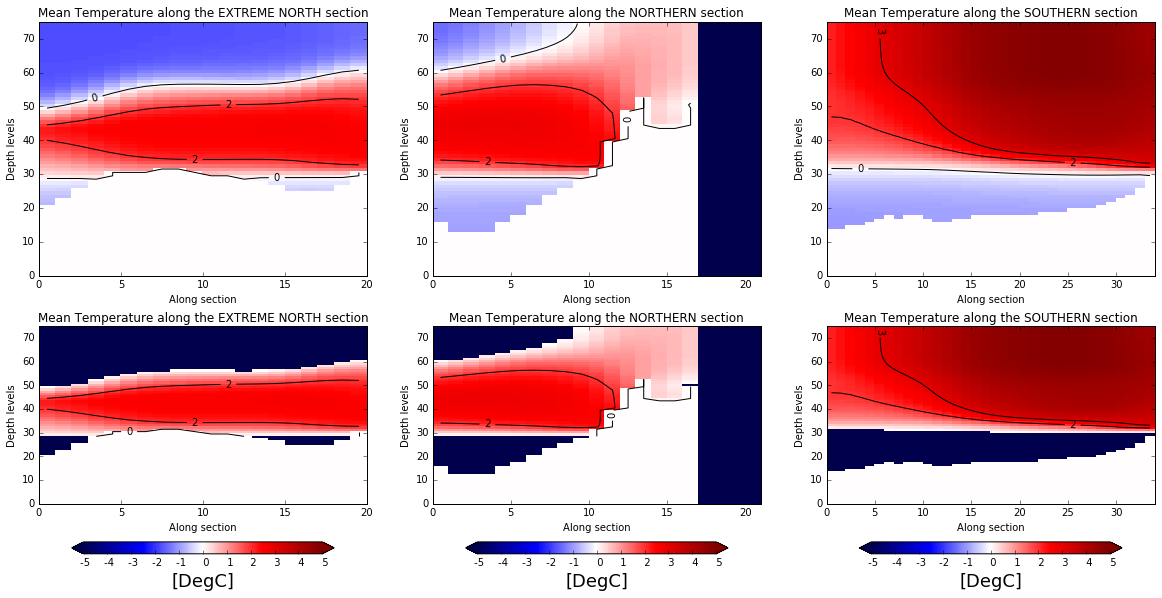

In [16]:
# Control the location of the mask
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_meanT'][::-1,:],vmin=-5., vmax=5.,cmap='seismic')
CS1=plt.contour(ds_diagsSecX['Ref_XS_FraWSC_meanT'][::-1,:],levels=[0.,2., 3.],colors='k',origin='lower',linestyles='solid')
plt.title('Mean Temperature along the EXTREME NORTH section')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')

plt.subplot(232)
plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_meanT'][::-1,:],vmin=-5., vmax=5.,cmap='seismic')
CS1=plt.contour(ds_diagsSecN['Ref_NS_FraWSC_meanT'][::-1,:],levels=[0.,2., 3.],colors='k',origin='lower',linestyles='solid')
plt.title('Mean Temperature along the NORTHERN section')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')

plt.subplot(233)
plt.pcolormesh(ds_diagsSecS['Ref_SS_FraWSC_meanT'][::-1,:],vmin=-5., vmax=5.,cmap='seismic')
CS1=plt.contour(ds_diagsSecS['Ref_SS_FraWSC_meanT'][::-1,:],levels=[0.,2.,3.],colors='k',origin='lower',linestyles='solid')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')
plt.title('Mean Temperature along the SOUTHERN section')

plt.subplot(234)
C=plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_meanTmsk'][::-1,:],vmin=-5., vmax=5.,cmap='seismic')
CS1=plt.contour(ds_diagsSecX['Ref_XS_FraWSC_meanTmsk'][::-1,:],levels=[0.,2., 3.],colors='k',origin='lower',linestyles='solid')
plt.title('Mean Temperature along the EXTREME NORTH section')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')
cbar = plt.colorbar(C,format='%3.0f',orientation='horizontal',shrink=0.8, extend='both')
cbar.set_label(r'[DegC]',fontsize=18)

plt.subplot(235)
C=plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_meanTmsk'][::-1,:],vmin=-5., vmax=5.,cmap='seismic')
CS1=plt.contour(ds_diagsSecN['Ref_NS_FraWSC_meanTmsk'][::-1,:],levels=[0.,2., 3.],colors='k',origin='lower',linestyles='solid')
plt.title('Mean Temperature along the NORTHERN section')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')
cbar = plt.colorbar(C,format='%3.0f',orientation='horizontal',shrink=0.8, extend='both')
cbar.set_label(r'[DegC]',fontsize=18)


plt.subplot(236)
C=plt.pcolormesh(ds_diagsSecS['Ref_SS_FraWSC_meanTmsk'][::-1,:],vmin=-5., vmax=5.,cmap='seismic')
CS1=plt.contour(ds_diagsSecS['Ref_SS_FraWSC_meanTmsk'][::-1,:],levels=[0.,2.,3.],colors='k',origin='lower',linestyles='solid')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')
plt.title('Mean Temperature along the SOUTHERN section')
cbar = plt.colorbar(C,format='%3.0f',orientation='horizontal',shrink=0.8, extend='both')
cbar.set_label(r'[DegC]',fontsize=18)



plt.savefig('./'+case_Ref+'_y'+RYEAR+'_TimeMean_Temp_LargeFraWSC_NorthSouthsections.pdf')

In [17]:
!date

Tue Jan 15 10:26:49 UTC 2019


### Compute the TIME-MEAN heat transport through the sections

In [18]:
# Compute the heat transport through the sections
rho_swater=1027. # [J.kg.K-1] 
Cp=4160. # [J.kg.K-1]


ds_diagsSecX['Ref_XS_FraWSC_meanHflx']=rho_swater*Cp*ds_diagsSecX['Ref_XS_FraWSC_e1e3V']* \
                                ds_diagsSecX['Ref_XS_FraWSC_meanTmsk']*ds_diagsSecX['Ref_XS_FraWSC_meanV']

ds_diagsSecN['Ref_NS_FraWSC_meanHflx']=rho_swater*Cp*ds_diagsSecN['Ref_NS_FraWSC_e1e3V']* \
                                ds_diagsSecN['Ref_NS_FraWSC_meanTmsk']*ds_diagsSecN['Ref_NS_FraWSC_meanV']

ds_diagsSecS['Ref_SS_FraWSC_meanHflx']=rho_swater*Cp*ds_diagsSecS['Ref_SS_FraWSC_e1e3V']* \
                                ds_diagsSecS['Ref_SS_FraWSC_meanTmsk']*ds_diagsSecS['Ref_SS_FraWSC_meanV']



In [19]:
!date

Tue Jan 15 10:26:50 UTC 2019


### Check the way the calculation is done for the TIME-MEAN heat flux 

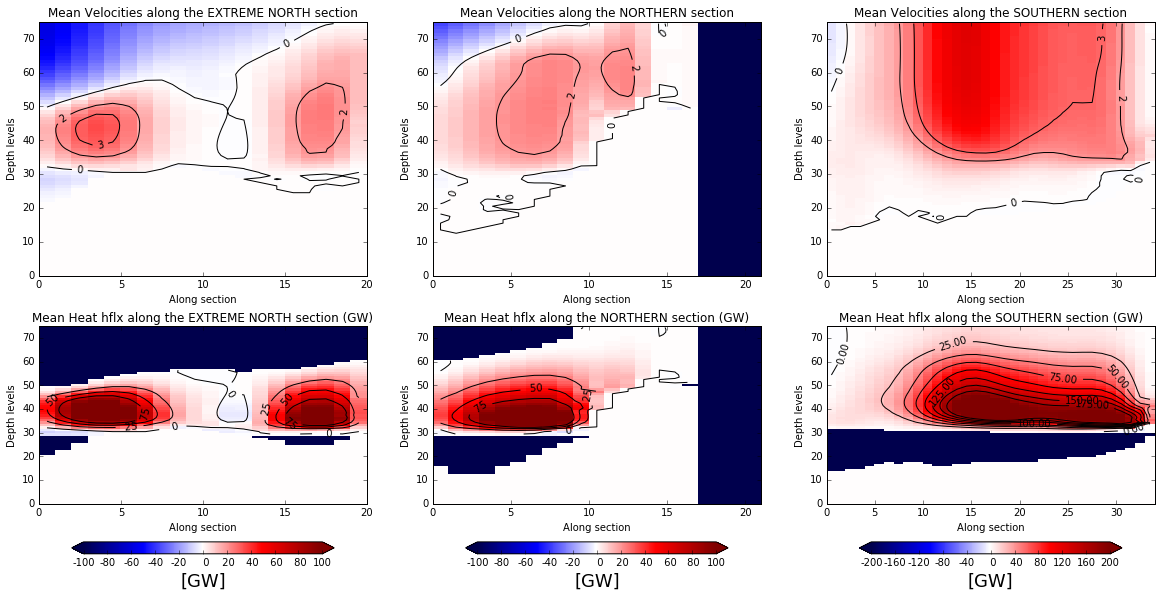

In [20]:

plt.figure(figsize=(20,10))
plt.subplot(231)
plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_meanV'][::-1,:]*1e2,vmin=-10., vmax=10.,cmap='seismic')
CS1=plt.contour(ds_diagsSecX['Ref_XS_FraWSC_meanV'][::-1,:]*1e2,levels=[0.,2., 3.],colors='k',origin='lower',linestyles='solid')
plt.title('Mean Velocities along the EXTREME NORTH section')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')

plt.subplot(232)
plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_meanV'][::-1,:]*1e2,vmin=-10., vmax=10.,cmap='seismic')
CS1=plt.contour(ds_diagsSecN['Ref_NS_FraWSC_meanV'][::-1,:]*1e2,levels=[0.,2., 3.],colors='k',origin='lower',linestyles='solid')
plt.title('Mean Velocities along the NORTHERN section')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')

plt.subplot(233)
plt.pcolormesh(ds_diagsSecS['Ref_SS_FraWSC_meanV'][::-1,:]*1e2,vmin=-10., vmax=10.,cmap='seismic')
CS1=plt.contour(ds_diagsSecS['Ref_SS_FraWSC_meanV'][::-1,:]*1e2,levels=[0.,2.,3.],colors='k',origin='lower',linestyles='solid')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.0f')
plt.title('Mean Velocities along the SOUTHERN section')

plt.subplot(234)
m_scal=1e-9
C=plt.pcolormesh(ds_diagsSecX['Ref_XS_FraWSC_meanHflx'][::-1,:]*m_scal,vmin=-100,vmax=100,cmap='seismic')
CS1=plt.contour(ds_diagsSecX['Ref_XS_FraWSC_meanHflx'][::-1,:]*m_scal,levels=np.arange(-100.,100.,25.),colors='k',origin='lower',linestyles='solid')
plt.title('Mean Heat hflx along the EXTREME NORTH section (GW)')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%3.0f')
cbar = plt.colorbar(C,format='%3.0f',orientation='horizontal',shrink=0.8, extend='both')
cbar.set_label(r'[GW]',fontsize=18)

plt.subplot(235)
m_scal=1e-9
C=plt.pcolormesh(ds_diagsSecN['Ref_NS_FraWSC_meanHflx'][::-1,:]*m_scal,vmin=-100,vmax=100,cmap='seismic')
CS1=plt.contour(ds_diagsSecN['Ref_NS_FraWSC_meanHflx'][::-1,:]*m_scal,levels=np.arange(-100.,100.,25.),colors='k',origin='lower',linestyles='solid')
plt.title('Mean Heat hflx along the NORTHERN section (GW)')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%3.0f')
cbar = plt.colorbar(C,format='%3.0f',orientation='horizontal',shrink=0.8, extend='both')
cbar.set_label(r'[GW]',fontsize=18)

plt.subplot(236)
C=plt.pcolormesh(ds_diagsSecS['Ref_SS_FraWSC_meanHflx'][::-1,:]*m_scal,vmin=-200,vmax=200,cmap='seismic')
CS1=plt.contour(ds_diagsSecS['Ref_SS_FraWSC_meanHflx'][::-1,:]*m_scal,levels=np.arange(-200.,200.,25.),colors='k',origin='lower',linestyles='solid')
plt.ylabel('Depth levels')
plt.xlabel('Along section')
plt.clabel(CS1, inline=True, fmt='%1.2f')
plt.title('Mean Heat hflx along the SOUTHERN section (GW)')

cbar = plt.colorbar(C,format='%3.0f',orientation='horizontal',shrink=0.8, extend='both')
cbar.set_label(r'[GW]',fontsize=18)


plt.savefig('./'+case_Ref+'_y'+RYEAR+'_TimeMean_VHflx_LargeFraWSC_NorthSouthsections.pdf')

In [21]:
!date

Tue Jan 15 10:26:53 UTC 2019


### Compute & output the heat flux Time-series through the sections

In [22]:
# Compute the heat transport through the sections
rho_swater=1027. # [J.kg.K-1] 
Cp=4160. # [J.kg.K-1]

ds_diagsSecX['Ref_XS_FraWSC_Hflx']=rho_swater*Cp*ds_diagsSecX['Ref_XS_FraWSC_e1e3V']* \
                                ds_diagsSecX['Ref_XS_FraWSC_Tmsk']*ds_diagsSecX['Ref_XS_FraWSC_V']

ds_diagsSecX['Ref_XS_FraWSC_Hflx_TiSe']= ds_diagsSecX['Ref_XS_FraWSC_Hflx'].sum(dim=('z','x'))

ds_diagsSecN['Ref_NS_FraWSC_Hflx']=rho_swater*Cp*ds_diagsSecN['Ref_NS_FraWSC_e1e3V']* \
                                ds_diagsSecN['Ref_NS_FraWSC_Tmsk']*ds_diagsSecN['Ref_NS_FraWSC_V']

ds_diagsSecN['Ref_NS_FraWSC_Hflx_TiSe']= ds_diagsSecN['Ref_NS_FraWSC_Hflx'].sum(dim=('z','x'))

ds_diagsSecS['Ref_SS_FraWSC_Hflx']=rho_swater*Cp*ds_diagsSecS['Ref_SS_FraWSC_e1e3V']* \
                                ds_diagsSecS['Ref_SS_FraWSC_Tmsk']*ds_diagsSecS['Ref_SS_FraWSC_V']

ds_diagsSecS['Ref_SS_FraWSC_Hflx_TiSe']= ds_diagsSecS['Ref_SS_FraWSC_Hflx'].sum(dim=('z','x'))

# Compute the volume through the 3 sections based on the T criteria defined above
ds_diagsSecX['Ref_XS_FraWSC_Vol']=ds_diagsSecX['Ref_XS_FraWSC_e1e3V']*ds_diagsSecX['Ref_XS_FraWSC_Vmsk']
ds_diagsSecX['Ref_XS_FraWSC_Vol_TiSe']= ds_diagsSecX['Ref_XS_FraWSC_Vol'].sum(dim=('z','x'))

ds_diagsSecN['Ref_NS_FraWSC_Vol']=ds_diagsSecN['Ref_NS_FraWSC_e1e3V']*ds_diagsSecN['Ref_NS_FraWSC_Vmsk']
ds_diagsSecN['Ref_NS_FraWSC_Vol_TiSe']= ds_diagsSecN['Ref_NS_FraWSC_Vol'].sum(dim=('z','x'))

ds_diagsSecS['Ref_SS_FraWSC_Vol']=ds_diagsSecS['Ref_SS_FraWSC_e1e3V']*ds_diagsSecS['Ref_SS_FraWSC_Vmsk']
ds_diagsSecS['Ref_SS_FraWSC_Vol_TiSe']= ds_diagsSecS['Ref_SS_FraWSC_Vol'].sum(dim=('z','x'))

# Compute the heat flux anomaly between the South and north to assess the 
# amount of heat flux lost between the 2 sections
ds_read['Ref_SS_FraWSC_Hflx_TiSe']=(('time'),ds_diagsSecS['Ref_SS_FraWSC_Hflx_TiSe']*1e-12)
ds_read['Ref_NS_FraWSC_Hflx_TiSe']=(('time'),ds_diagsSecN['Ref_NS_FraWSC_Hflx_TiSe']*1e-12)
ds_read['Ref_XS_FraWSC_Hflx_TiSe']=(('time'),ds_diagsSecX['Ref_XS_FraWSC_Hflx_TiSe']*1e-12)

ds_read['Ref_SS_FraWSC_Vol_TiSe']=(('time'),ds_diagsSecS['Ref_SS_FraWSC_Vol_TiSe']*1e-6)
ds_read['Ref_NS_FraWSC_Vol_TiSe']=(('time'),ds_diagsSecN['Ref_NS_FraWSC_Vol_TiSe']*1e-6)
ds_read['Ref_XS_FraWSC_Vol_TiSe']=(('time'),ds_diagsSecX['Ref_XS_FraWSC_Vol_TiSe']*1e-6)


ds_read['Ref_FraWSC_S-N_Hflx_ano']=(('time'),(ds_diagsSecS['Ref_SS_FraWSC_Hflx_TiSe']-ds_diagsSecN['Ref_NS_FraWSC_Hflx_TiSe'])*1e-12)                             
ds_read['Ref_FraWSC_S-X_Hflx_ano']=(('time'),(ds_diagsSecS['Ref_SS_FraWSC_Hflx_TiSe']-ds_diagsSecX['Ref_XS_FraWSC_Hflx_TiSe'])*1e-12)                             

ds_read.to_netcdf('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_Full_LargeFraWSC_TiSe_Quant.nc', unlimited_dims={'time':True})

In [23]:
!date

Tue Jan 15 10:26:54 UTC 2019


### Plot the heat flux Time-series through sections

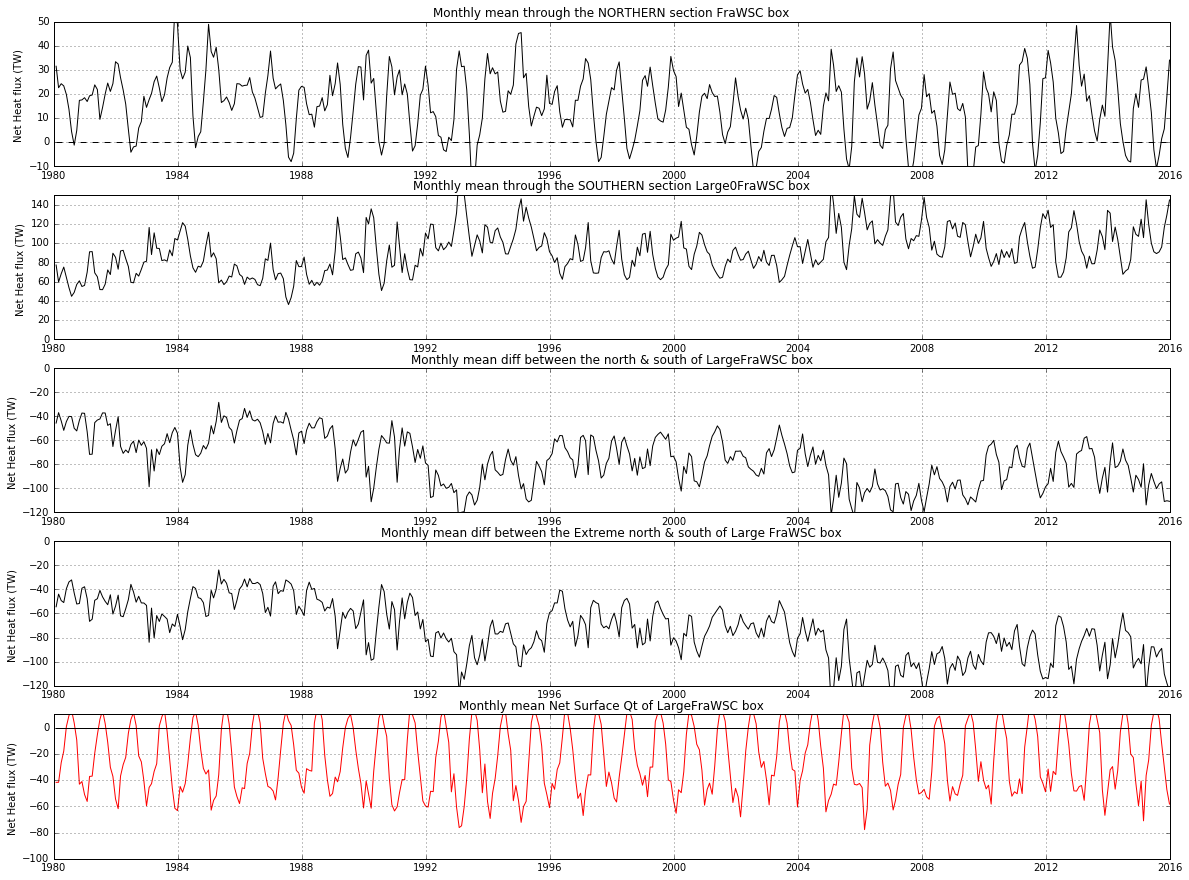

In [24]:

monthly_time=pd.date_range(start=str(s_year)+'-01-01',end=str(e_year)+'-12-31',freq='M')

m_alpha=1e-12
plt.figure(figsize=(20,15))
ax=plt.subplot(511)
ax.plot(monthly_time,ds_diagsSecN['Ref_NS_FraWSC_Hflx_TiSe']*m_alpha, 'k')

ax.plot(monthly_time,np.zeros(len(monthly_time)),'k--')
ax.set_xlim(str(s_year),str(e_year+1))
ax.set_ylim(-10.,50.)
plt.ylabel('Net Heat flux (TW) ')
plt.title(r'Monthly mean through the NORTHERN section FraWSC box')
plt.grid(True)

ax=plt.subplot(512)   ; 
ax.plot(monthly_time,ds_diagsSecS['Ref_SS_FraWSC_Hflx_TiSe']*m_alpha, 'k')

ax.plot(monthly_time,np.zeros(len(monthly_time))*m_alpha,'k')
ax.set_xlim(str(s_year),str(e_year+1))
ax.set_ylim(0.,150.)
plt.ylabel('Net Heat flux (TW) ')
plt.title(r'Monthly mean through the SOUTHERN section Large0FraWSC box')
plt.grid(True)


ax=plt.subplot(513)   ; 
ax.plot(monthly_time,(ds_diagsSecN['Ref_NS_FraWSC_Hflx_TiSe']-ds_diagsSecS['Ref_SS_FraWSC_Hflx_TiSe'])*m_alpha, 'k')

ax.plot(monthly_time,np.zeros(len(monthly_time))*m_alpha,'k')
ax.set_xlim(str(s_year),str(e_year+1))
ax.set_ylim(-120.,00.)
plt.ylabel('Net Heat flux (TW) ')
plt.title(r'Monthly mean diff between the north & south of LargeFraWSC box')
plt.grid(True)

ax=plt.subplot(514)   ; 
ax.plot(monthly_time,(ds_diagsSecX['Ref_XS_FraWSC_Hflx_TiSe']-ds_diagsSecS['Ref_SS_FraWSC_Hflx_TiSe'])*m_alpha, 'k')

ax.plot(monthly_time,np.zeros(len(monthly_time))*m_alpha,'k')
ax.set_xlim(str(s_year),str(e_year+1))
ax.set_ylim(-120.,00.)
plt.ylabel('Net Heat flux (TW) ')
plt.title(r'Monthly mean diff between the Extreme north & south of Large FraWSC box')
plt.grid(True)

dsQtnet=xr.open_dataset('./NETCDF/BOX-LargeFraWSC/'+case_Ref+'_y'+RYEAR+'_TiSe_NetHeatQt_LargeFraWSC.nc')

ax=plt.subplot(515)   ; 
ax.plot(monthly_time,dsQtnet['Ref_Qtdxdy_FraWSC_meanTiSe']*m_alpha , 'r')
ax.plot(monthly_time,np.zeros(len(monthly_time))*m_alpha,'k')
ax.set_xlim(str(s_year),str(e_year+1))
ax.set_ylim(-100.,10.)
plt.ylabel('Net Heat flux (TW) ')
plt.title(r'Monthly mean Net Surface Qt of LargeFraWSC box')
plt.grid(True)

plt.savefig('./'+case_Ref+'_y'+RYEAR+'_TiSe_Hflx_LargeFraWSC_budget.pdf')

In [25]:
!date

Tue Jan 15 10:26:55 UTC 2019
